## Esercitazione 6 - 25 Marzo 2025 - Soluzione

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



In [5]:
import math

In [4]:
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [3]:
def metodo_bisezione(fname, a, b, tolx):
 """
 Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a)
 fb=fname(b)
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 
 while abs(b - a) > tolx:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)<0:  #la radice si trova nell'intervallo [a, xk].
      b = xk
      fb=fxk
    elif sign(fxk)*sign(fb)<0:   #la radice si trova nell'intervallo [xk, b].
      a = xk
      fa=fxk

 
 return xk, it, v_xk




In [2]:
def falsi(fname, a, b, maxit, tolx,tolf):
 """
 Implementa il metodo di falsa posizione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a);
 fb=fname(b);
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di falsa posizione \n")
     return None, None,None

 it = 0
 v_xk = []
 
 fxk=tolf+1

 errore=tolx+1
 xprec=a
 
 while it < maxit  and abs(fxk) > tolf and errore > tolx :
    xk = a-fa*(b-a)/(fb-fa)
    v_xk.append(xk)
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)<0:  #la radice si trova nell'intervallo [a, xk].
      b = xk
      fb=fxk
    elif sign(fxk)*sign(fb)<0:   #la radice si trova nell'intervallo [xk, b].
      a = xk
      fa=fxk

    if xk!=0:
         errore=abs(xk-xprec)/abs(xk)
    else:
         errore=abs(xk-xprec)
    
    xprec=xk
    it += 1
 return xk, it, v_xk


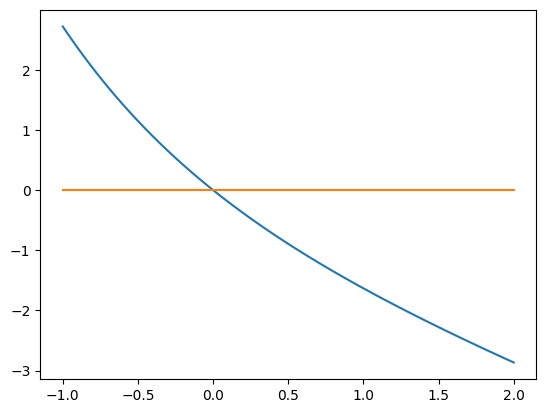

Lo zero approssimato da bisezione è:  -2.2737367544323206e-13 Valore di f in  -2.2737367544323206e-13 ---> 4.547473508864641e-13 Numero di iterazioni  42
Lo zero approssimato da falsa posizione è:  3.2573943542502093e-13 Valore di f in  3.2573943542502093e-13 ---> -6.514788708500419e-13 Numero di iterazioni  22


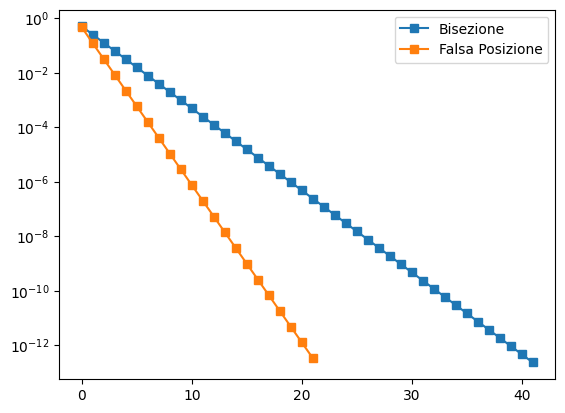

In [6]:
# Esempio di utilizzo
import numpy as np
import matplotlib.pyplot as plt
 
 
scelta=int(input("Scegli funzione di cui calcolare lo zero"))

match scelta:
    
    case 1:
        f= lambda x:x**3-6*x**2-4*x+24
        #Intervallo di definizione
        a = -3
        b = 8
        alfa=-2  #Uno dei valori in cui si annulla la funzioe
        #Intervallo in cui è contenuta la prima soluzione
        a1=-3.0
        b1=0.0
    case 2:
        f= lambda x: np.exp(-x)-(x+1)
        alfa=0
        a1 = -1
        b1 = 2
        a=a1
        b=b1
    case 3:
        f=  lambda x: np.log2(x+3)-2 #log_b(a)=log(a)/log(b)
        alfa= 1
        a1 = -1
        b1 = 2
        a=a1
        b=b1

    case 4:
        f= lambda x: np.sqrt(x)-(x**2)/4 
        alfa=2.0**(4/3.0)
        a1 = 1
        b1 = 3
        a=a1
        b=b1

xx=np.linspace(a,b,100)
plt.plot(xx,f(xx),xx,np.zeros_like(xx))
 
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero,it,xk = metodo_bisezione(f, a1, b1, tolx)
 
zero_f,it_f,xk_f = falsi(f, a1, b1, maxit, tolx,tolf)
 
 
xk=np.array(xk)

if (zero!=None):
    print("Lo zero approssimato da bisezione è: ",zero, "Valore di f in ",zero, "--->", f(zero), "Numero di iterazioni ",it)
    ek=np.abs(xk-alfa)
    plt.semilogy(range(it),ek,'-s')

xk_f=np.array(xk_f)
if (zero_f!=None):
    print("Lo zero approssimato da falsa posizione è: ",zero_f, "Valore di f in ",zero_f, "--->", f(zero_f),"Numero di iterazioni ",it_f)
    ek_f=np.abs(xk_f-alfa)
    plt.semilogy(range(it_f),ek_f,'-s')

plt.legend(['Bisezione','Falsa Posizione'])

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.
 

## Esercizio 3
Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

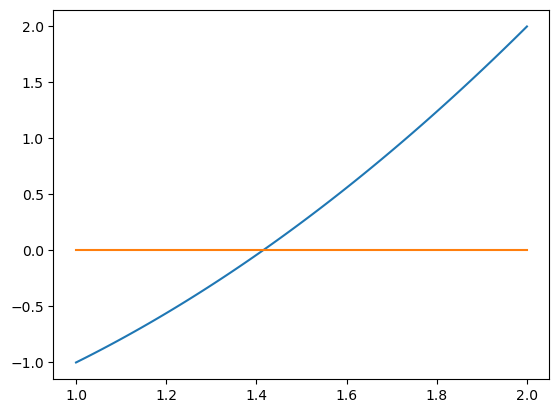

In [73]:
#Calcolare il la radice quadrata di 2 equivale a calcolare lo zero della funzione x**2-2 nel semiasse positivo
f4= lambda x: x**2-2

a=1.0
b=2.0
xx=np.linspace(a,b,100)
plt.plot(xx,f4(xx),xx,np.zeros_like(xx))
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero_b_4,it_b_4,xk_b_4 = metodo_bisezione(f4, a, b, tolx)



In [74]:
alfa=np.sqrt(2)
err_rel_bis_4=np.abs(np.array(xk_b_4)-alfa)
print("zero =",zero_b_4," numero di iterazioni ",it_b_4)

zero = 1.4142135623724243  numero di iterazioni  40


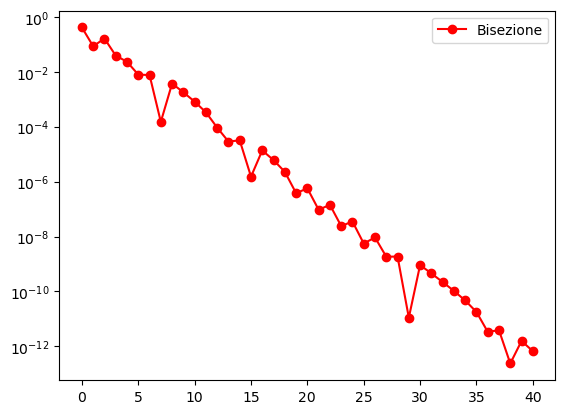

In [71]:
plt.semilogy(range(it_b_4),err_rel_bis_4,'r-o')
plt.legend(['Bisezione'])

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [75]:
  
#Calcolo della norma 1
def mynorma1(B):
    c=np.sum(np.abs(B),axis=0)  #equivale a sommare gli elementi di tutte le colonne 
    n1=np.max(c)
    return n1

In [76]:
#Calcolo della norma infinito
def mynormainf(B):
    c=np.sum(np.abs(B),axis=1)  #equivale a sommare gli elementi di tutte le righe
    ninf=np.max(c)
    return ninf 

In [77]:
B=np.array([[2.0],[3],[4],[5]])
norma1=mynorma1(B)
normainf=mynormainf(B)
print("mynorma1=", norma1)
print("norma 1 con numpy.linalg.norm ", np.linalg.norm(B,1))#Calcolo della norma 1
print("mynormainf=", normainf)
print("norma inf con numpy.linalg.norm ", np.linalg.norm(B,np.inf))

mynorma1= 14.0
norma 1 con numpy.linalg.norm  14.0
mynormainf= 5.0
norma inf con numpy.linalg.norm  5.0


In [78]:
x=np.array([[2.0],[-3.0],[7.0]])
print("my norma 1 -->",mynorma1(x))
print("norma 1 con numpy.linalg.norm ",np.linalg.norm(x,1))

my norma 1 --> 12.0
norma 1 con numpy.linalg.norm  12.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [ ]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])

In [80]:
def mynorma2(A):
    M=A.T@A
    autovalori=np.linalg.eigvals(M)
    n2=np.sqrt(np.max(np.abs(autovalori)))
    return n2

In [81]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
norma2=mynorma2(A)
print("mynorma 2",norma2)
print("norma 2 con numpy.linalg.norm ", np.linalg.norm(A,2))

mynorma 2 9.056251013341882
norma 2 con numpy.linalg.norm  9.056251013341878
